<center> 
    <h1> 
        Projet Reinforcement Learning
    <h2> 
        Notebook algorithme MuZero

<center>
<img src="https://venturebeat.com/wp-content/uploads/2020/04/260dcb5d-b808-40f3-947f-c28e349c3da4-e1585799405647.png?resize=1198%2C600&strip=all" width="200px"> <br>
<img src="https://www.telecom-sudparis.eu/wp-content/uploads/2020/02/81889345d20c3cbe29ad.png" width="200px">

<div style="text-align: right">
    <em>
        Auteurs (article) : Julian Schrittwieser, Ioannis Antonoglou, et al. <br>
        Auteur (code initial) : Johan Gras : https://github.com/johan-gras/MuZero <br>
        Auteurs (rapport et notebook) : Billiot Bastien, Demay Ulysse, Ilbert Romain <br>
        Professeur : E. Le Pennec 
        <br>
        Mars 2021 
    </em>
</div>

## Sommaire

* [Introduction à notre travail d'implémentation](#introduction) 
    * [Rappel des motivations des auteurs et de leur choix de jeux pour l'implémentation](#auteurs)
    * [Notre travail d'implémentation](#implementation)
    * [Structure](#structure)
* [Pré-requis](#pre-requis)
* [Notion de jeu](#jeu)
    * [Classes abstraites](#classes_abstraites)
    * [Standardisation des observations](#standardisation)
    * [Le jeu du CartPole](#jeu_cartpole)
    * [Autre jeu : Acrobot](#jeu_acrobot)
* [Réseaux](#reseaux)
    * [Les classes de base](#classes_base)
    * [Sauvegarde du réseau](#sauvegarde_reseau)
    * [Le réseau du CartPole](#reseau_cartpole)
    * [Autre jeu : Acrobot](#reseau_acrobot)
* [Configuration pour l'algorithme](#config)
* [Monte Carlo Tree Search (MCTS)](#MCTS)
    * [L'implémentation de la sélection](#selection)
    * [L'implémentation de l'expansion d'un noeud](#expansion)
    * [L'implémentation de la rétropropagation](#retropropagation)
    * [Excécution de la recherche MCTS et sélection de l'action réalisée](#excecution)
* [Entraînement](#entrainement)
    * [Replay Buffer](#replay_buffer)
    * [Self-play](#self-play)
    * [Training](#training)
* [MuZero](#muzero)
* [Sauvegarde / Chargement d'un réseau entraîné](#reseau_entraine)
* [Exécution de MuZero](#exec_muzero)
    * [Exécution pour le CartPole](#exec_cartpole)
        * [Entraînement from scratch](#from_scratch)
        * [Exemple de sauvegarde et chargement du réseau obtenu](#ex_save)
            * [Sauvegarde](#sauvegarde)
            * [Chargement](#chargement)
        * [Résultats pour plusieurs entraînement](#resultats)
    * [Exécution pour Acrobot](#exec_acrobot)

## Introduction à notre travail d'implémentation <a class="anchor" id="introduction"></a>

### Rappel des motivations des auteurs et de leur choix de jeux pour l'implémentation <a class="anchor" id="auteurs"></a>

En plus de leur article, les auteurs de *Mastering Atari, Go, Chess and Shogi by Planning with a Learned Model* fournissent un pseudo-code pour implémenter l'algorithme *MuZero*. Il existe plusieurs manières d'implémenter cet algorithme qui peuvent dépendre des jeux considérés. Dans le cadre de leur article, les auteurs proposent donc d'implémenter leur algorithme pour les jeux de Go, shogi, d'échecs et Atari. En effet, comme présenté dans notre rapport, la motivation de l'article et de *MuZero* est de construire un algorithme d'apprentissage *model-based* qui permet notamment d'obtenir des performances à l'état de l'art dans les problèmes classiquement réalisés par des algorithmes *model-based*. Ces résultats sont notamment obtenus par *AlphaZero* et les problèmes sont les jeux d'échecs, le jeu de Go et le Shogi. L'intérêt principal de MuZero est d'en plus de cela d'obtenir des performances à l'état de l'art dans des problèmes comme Atari 2600 qui sont traditionnellement obtenus par des méthodes *model-free*, donc non obtenus par exemple par *AlphaZero*. C'est pourquoi l'implémentation est centrée sur ces jeux-ci. Dans notre rapport, nous présentons notamment les résultats obtenus par les auteurs sur ces jeux et donc la réponse à la motivation de l'article.

Cependant, nous avons décidé, plutôt que de refaire l'algorithme sur les mêmes jeux et obtenir des résultats similaires d'implémenter MuZero sur d'autres jeux. Ce choix permet notamment de montrer notre compréhension de l'algorithme mais aussi notre capacité à l'implémenter sur un nouveau jeu. 

### Notre travail d'implémentation <a class="anchor" id="implementation"></a>

Pour ce projet, nous allons nous intéresser à l'implémentation de *MuZero* de Johan Gras, fidèle au pseudo-code et principalement adaptée pour les jeux un-joueur. Cette implémentation peut fonctionner pour différents jeux mais le code disponible sur le dépôt Git la particularise seulement pour le CartPole, jeu un joueur en 1D qui ne nécessite donc pas de Convolutional Neural Networks. Afin de pouvoir avoir une implémentation fonctionnelle de *MuZero* nous avons donc repris le code du Johan Gras dont le dépôt Git est le suivant : https://github.com/johan-gras/MuZero. Nous avons mis ce code dans un notebook afin de pouvoir l'expliquer au mieux et d'en dérouler les étapes de manière similaire à l'article.

Il existe plusieurs implémentation de l'algorithme *MuZero*, la plus connue étant celle de Werner Duvaud disponible ici : https://github.com/werner-duvaud/muzero-general. Cette implémentation est très complète et propose de nombreux blocs supplémentaires comme la sauvegarde de réseau, un grand nombre de jeux prix en charge, une visualisation en console et en fenêtre des jeux mais aussi un monitoring de l'entraînement via Tensorboard. Nous n'avons pas choisi d'utiliser ce dépôt afin d'obtenir un code plus concis et plus fidèle à l'article mais aussi de pouvoir expliquer le code en détail en se concentrant sur l'algorithme *MuZero* lui-même et non les différents ajouts qui auraient pu être faits.

Enfin, la valeur ajoutée de ce notebook par rapport au code présent sur le dépôt Git est son explication détaillée grâce à un découpage en parties correspondant aux concepts de l'article, de nombreux paragraphes entre les différentes cellules mais aussi des commentaires dans le code afin de mieux comprendre l'action de fonctions importantes. De plus, nous avons ajouté une section *Sauvegarde / Chargement d'un réseau entraîné* permettant de sauvegarder un réseau entraîné pour un jeu dans un dossier choisi. L'affichage de graphes pour visualiser l'entraînement de l'algorithme n'est pas non plus présent dans le dépôt de Johan Gras.

Enfin, si les auteurs de notre article implémentent *MuZero* sur les jeux d'échecs, le jeu de Go, le Shogi et Atari 2600, l'implémentation de Johan Grasse concentre uniquement sur le jeu du CartPole. Afin d'aller plus loin nous proposons l'implémentation sur un autre jeu : Acrobot. 

### Structure <a class="anchor" id="structure"></a>

La structure de ce notebook est la suivante:
- La section **Notion de jeu** contient l'implémentation d'un jeu vu comme son état à un tour donné. Elle permet notamment de calculer les policy, value et reward cibles utilisées pour l'entraînement.
- La section **Réseaux** contient l'architecture du réseau de notre algorithme adapté pour le jeu choisi (ici CartPole et Acrobot) ainsi que tous les éléments entraînables.
- La section **Configuration pour l'algorithme** donne une structure permettant de fournir à l'algorithme MuZero tous les hyperparamètres, la classe qu'elle contient est abstraite et doit être héritée et redéfinie pour le jeu choisi.
- La section **Monte Carlo Tree Search (MCTS)** contient l'implémentation des arbres de recherche de Monte Carlo servant à choisir une action à effectuer à partir de l'état d'un jeu à un tour donnée.
- La section **Entraînement** contient le `ReplayBuffer`, objet stockant toutes les parties simulées à partir du réseau tel qu'il est en début de boucle d'entraînement et dont les instants peuvent être échantillonnés pour l'entraînement. Elle contient aussi la définition de la loss et la mise à jour des poids grâce à l'optimiseur choisi et le `Self-Play` qui permet de simuler des parties du jeu choisi à partir du réseau tel qu'il est à une boucle d'entraînement donnée. On peut stocker ces parties dans le `ReplayBuffer` lors de la phase d'entraînement mais aussi évaluer notre modèle sur ces parties simulées en mode évaluation.
- La section **MuZero** combine les différents éléments précédents pour pouvoir exécuter MuZero de son initialisation à l'entraînement de son réseau et son évaluation.
- La section **Sauvegarde / Chargement d'un réseau entraîné** contient la fonction que nous avons ajouté à l'implémentation originale. Elle permet de sauvegarder un réseau entraîné dans un dossier choisi et de le recharger pour en poursuivre l'entraînement.
- La section **Exécution de MuZero** est un exemple d'exécution de l'algorithme pour le jeu du CartPole dont la configuration est donnée ainsi qu'un graphe présentant les score de train et d'évaluation obtenus.

## Pré-requis <a class="anchor" id="pre-requis"></a>

In [ ]:
import collections
import math
import typing
from typing import Dict, List, Optional, Callable
import random
from itertools import zip_longest
import pickle 

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import MSE
from tensorflow.keras import Model, regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model

from abc import abstractmethod, ABC
import gym

In [ ]:
MAXIMUM_FLOAT_VALUE = float('inf')

La classe `Node` définie ci-dessous représente un noeud, nécessaire pour les arbres de recherche de Monte Carlo (MCTS). Nous devons la définir au début du notebook car elle est utile dans tout le code. En effet, à chaque tour MuZero s'appuie sur les MCTS et leurs différents noeuds qui correspondent aux états cachés du jeu.

En plus de disposer des attributs classiques d'un noeud d'un arbre de recherche, ces noeuds possèdent un attribut `prior` afin d'incorporer le bruit d'exploration de Dirichlet dans la racine de l'arbre. Il est important de noter aussi qu'il stockent leur value et leur reward mises à jour lors du parcours de l'arbre.

In [ ]:
class Node(object):
    """A class that represent nodes inside the MCTS tree"""

    def __init__(self, prior: float):
        self.visit_count = 0 # Counts number of times the node is visited during the search 
        self.to_play = -1
        self.prior = prior 
        self.value_sum = 0
        self.children = {} # Contains the children node in the MCTS tree
        self.hidden_state = None
        self.reward = 0 # Immediate reward given by the dynamics function 

    def expanded(self) -> bool: # Is the node terminal or expanded (does it have chidren nodes or not ?)
        return len(self.children) > 0 

    def value(self) -> Optional[float]: 
        if self.visit_count == 0:
            return None
        return self.value_sum / self.visit_count

## Notion de jeu <a class="anchor" id="jeu"></a>

La première étape pour implémenter notre algorithme MuZero est d'implémenter la notion de jeu. En effet, les classes suivantes donnent un cadre pour les concepts de base nécessaire aux algorithmes de Reinforcement Learning : les actions (ainsi que l'historique des actions effectuées), les joueurs (non utile en pratique puisque l'algorithme joue seul) et surtout les jeux.

### Classes abstraites <a class="anchor" id="classes_abstraites"></a>

In [ ]:
class Action(object):
    """ Class that represent an action of a game."""

    def __init__(self, index: int):
        self.index = index

    def __hash__(self):
        return self.index

    def __eq__(self, other):
        return self.index == other.index

    def __gt__(self, other):
        return self.index > other.index

In [ ]:
class Player(object):
    """
    A one player class.
    This class is useless, it's here for legacy purpose and for potential adaptations for a two players MuZero.
    """

    def __eq__(self, other):
        return True

In [ ]:
class ActionHistory(object):
    """
    Simple history container used inside the search.
    Only used to keep track of the actions executed.
    """

    def __init__(self, history: List[Action], action_space_size: int):
        self.history = list(history) #Initialize the actions' history container 
        self.action_space_size = action_space_size 

    def clone(self):
        return ActionHistory(self.history, self.action_space_size)

    def add_action(self, action: Action): # Creates the history through the action taken (abstract class Action defined two cells above)
        self.history.append(action)

    def last_action(self) -> Action: # Allows to retrieve last action taken
        return self.history[-1]

    def action_space(self) -> List[Action]: 
        return [Action(i) for i in range(self.action_space_size)]

    def to_play(self) -> Player: # See abstract and unused class Player() in the above cell 
        return Player()

La classe suivante, `AbstractGame` est une classe abstraite implémentant la structure générale d'un jeu. Un jeu doit contenir les rewards et les actions associées à chaque tour mais aussi le facteur de discount pour calculer la value target. Il est important de noter qu'une instance de cette classe représente un seul état du jeu et est donc valide pendant un unique tour.

Parmis les fonctions que cette classe implémente, la fonction `make_target()` est à noter. Celle-ci permet de calculer les targets, c'est à dire les policy, value et reward cibles pouvant être atteintes à l'issue d'un tour. Pour la value target il s'agit de la value à la racine multipliée par le facteur de discount exposant `td_steps` le nombre d'étapes hypothétiques futures choisies pour ce calcul, à laquelle s'ajoute la somme des rewards discountées entre cette derière étape hypothétique et la racine. C'est à partir de ces différentes targets (appelées quantités cibles dans le rapport) que l'algorithme pourra apprendre pendant la phase d'entraînement.

Le jeu du CartPole implémenté par la suite hérite de cette classe et redéfinit les différentes fonctions abstraites propres à chaque jeu.

In [ ]:
class AbstractGame(ABC):
    """
    Abstract class that allows to implement a game.
    One instance represent a single episode of interaction with the environment.
    """

    def __init__(self, discount: float):
        self.history = [] 
        self.rewards = []
        self.child_visits = []
        self.root_values = []
        self.discount = discount

    def apply(self, action: Action):
        """Apply an action onto the environment."""

        reward = self.step(action) # Apply the action on the environment 
        self.rewards.append(reward) # Stores the immediate reward of the action 
        self.history.append(action) # Stores the action in the ActionHistory

    def store_search_statistics(self, root: Node):
        """After each MCTS run, store the statistics generated by the search."""

        sum_visits = sum(child.visit_count for child in root.children.values())
        action_space = (Action(index) for index in range(self.action_space_size))
        self.child_visits.append([
            root.children[a].visit_count / sum_visits if a in root.children else 0
            for a in action_space
        ])
        self.root_values.append(root.value())

    def make_target(self, state_index: int, num_unroll_steps: int, td_steps: int, to_play: Player):
        """Generate targets to learn from during the network training."""

        # The value target is the discounted root value of the search tree td_steps steps
        # into the future, plus the discounted sum of all rewards until then.
        targets = []
        for current_index in range(state_index, state_index + num_unroll_steps + 1):
            bootstrap_index = current_index + td_steps
            if bootstrap_index < len(self.root_values):
                value = self.root_values[bootstrap_index] * self.discount ** td_steps # Computes the bootstrap index discounted target value term 
            else:
                value = 0

            for i, reward in enumerate(self.rewards[current_index:bootstrap_index]):
                value += reward * self.discount ** i # Computes the target value for the training 

            if current_index < len(self.root_values):
                targets.append((value, self.rewards[current_index], self.child_visits[current_index])) 
                # Stores the targets for the training : value which has just been caclulated 
            else:
                # States past the end of games are treated as absorbing states.
                targets.append((0, 0, []))

        return targets

    def to_play(self) -> Player:
        """Return the current player."""
        return Player()

    def action_history(self) -> ActionHistory:
        """Return the actions executed inside the search."""
        return ActionHistory(self.history, self.action_space_size)

    # Methods to be implemented by the child class
    @property
    @abstractmethod
    def action_space_size(self) -> int:
        """Return the size of the action space."""
        pass

    @abstractmethod
    def step(self, action) -> int:
        """Execute one step of the game conditioned by the given action."""
        pass

    @abstractmethod
    def terminal(self) -> bool:
        """Is the game is finished?"""
        pass

    @abstractmethod
    def legal_actions(self) -> List[Action]:
        """Return the legal actions available at this instant."""
        pass

    @abstractmethod
    def make_image(self, state_index: int):
        """Compute the state of the game."""
        pass

### Standardisation des observations <a class="anchor" id="standardisation"></a>

The goal of this class is to take the observations and applying a min-max scaling on them so they are between -1 and 1.

Cette classe permet de standardiser les observations via la méthode min-max, le but étant de les ramener entre -1 et 1 et que leur moyenne soit nulle. Pour ce faire, cette classe hérite de la classe `ObservationWrapper` déjà implémentée dans la bibliothèque `gym`. Les wrappers fournis par `gym` sont des outils puissants permettant d'ajouter des fonctionnalités aux différents environnements fournis, ici la standardisation des observations pour les rendre utilisables par notre algorithme.

Les paramètres `low` et `high` passés à cette classe dépendent du jeu choisi, ce sont des vecteurs de la même dimension que les observations du jeu. Ils correspondent en fait aux valeurs maximales et minimales que peuvent prendre chacune des dimensions de l'observation. Pour les jeux de la bibliothèque `Gym` ces valeurs sont très souvent précisées dans le fichier implémentant le jeu dans le dossier https://github.com/openai/gym/tree/master/gym/envs. 

In [ ]:
class ScalingObservationWrapper(gym.ObservationWrapper):
    """
    Wrapper that apply a min-max scaling of observations.
    """

    def __init__(self, env, low=None, high=None):
        super().__init__(env)
        assert isinstance(env.observation_space, gym.spaces.Box)

        '''
        Ces trois print permettent de voir la dimension des observations du jeu considéré
        ainsi que leurs valeurs extrémales.
        print(self.observation_space)
        print(self.observation_space.low)
        print(self.observation_space.high)
        '''

        low = np.array(self.observation_space.low if low is None else low)
        high = np.array(self.observation_space.high if high is None else high)

        self.mean = (high + low) / 2
        self.max = high - self.mean

    def observation(self, observation):
        return (observation - self.mean) / self.max

### Le jeu du CartPole <a class="anchor" id="jeu_cartpole"></a>

Le jeu du CartPole consiste à essayer de maintenir droit un pendule inversé situé sur une plateforme pouvant se déplacer sur un axe horizontal en applicant des forces sur la plateforme. Pour l'implémenter la classe `CartPole` hérite de `AbstractGame` et s'appuie surtout sur l'environnement `CartPole-v1` présent dans la bibliothèque `Gym` (https://gym.openai.com/envs/CartPole-v1/) et dont le code source est disponible ici: https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py.

Il est important de noter que l'attribut actions content la liste de toutes les actions possibles dans ce jeu, directement fournies par l'environnement. Les méthodes implémentées permettent notament d'effectuer une étape du jeu à partir de l'action choisie, d'indiquer si un jeu est terminé ou non ou encore de produire une observation à partir des états du jeu.

Pour ce jeu les observations sont de dimension 4 et les dimensions du vecteur correspondent à `[position du cart, vitesse du cart, angle de la tige, vitesse de rotation de la tige]`. Il y a deux actions possibles qui sont déplacer le cart vers la droite ou le déplacer vers la gauche. La reward est de 1 pour chaque étape supplémentaire réussie (i.e. lorsque la barre ne tombe pas).

In [ ]:
class CartPole(AbstractGame):
    """
    The Gym CartPole environment
    Define the abstract functions of the AbstractGame() class define previously to fit the CartPole game and environment
    """
    def __init__(self, discount: float):
        super().__init__(discount)
        # Load the game environment from gym
        self.env = gym.make('CartPole-v1')
        # Use previously presented function to scale observations between -1 and 1 (null mean)
        self.env = ScalingObservationWrapper(self.env, low=[-2.4, -2.0, -0.42, -3.5], high=[2.4, 2.0, 0.42, 3.5]) 
        # Initialize all possible actions of the game
        self.actions = list(map(lambda i: Action(i), range(self.env.action_space.n)))
        self.observations = [self.env.reset()]
        self.done = False

    @property
    # Define useful functions specific to the game (concrete functions of class AbstractGame())
    def action_space_size(self) -> int:
        """Return the size of the action space."""
        return len(self.actions)

    def step(self, action) -> int:
        """Execute one step of the game conditioned by the given action."""

        observation, reward, done, _ = self.env.step(action.index)
        self.observations += [observation]
        self.done = done
        return reward

    def terminal(self) -> bool:
        """Is the game is finished?"""
        return self.done

    def legal_actions(self) -> List[Action]:
        """Return the legal actions available at this instant."""
        return self.actions

    def make_image(self, state_index: int):
        """Compute the state of the game."""
        return self.observations[state_index]

### Autre jeu : Acrobot <a class="anchor" id="jeu_acrobot"></a>

En plus du jeu du CartPole implémenté nous avons tené d'ajouter un nouveau jeu, Acrobot. L'environnement de ce jeu est implémenté dans la bibliothèque `Gym` aussi et c'est un jeu en 1D. Les observations sont de dimension 6: `[cos(theta1) sin(theta1) cos(theta2) sin(theta2) thetaDot1 thetaDot2]`. Il y a 3 actions possibles: appliquer un couple de -1, 0 ou 1 sur la jointure entre les deux pendules. 

Le code source de ce jeu peut être trouvé sur la page https://github.com/openai/gym/blob/master/gym/envs/classic_control/acrobot.py. En parcourant un peu ce code on eut constater que la principale différence entre CartPole et ce jeu est que la reward peut être -1 ou 0 et donc elle n'est pas toujours positive.

In [ ]:
class Acrobot(AbstractGame):
    """The Gym Acrobot environment"""

    def __init__(self, discount: float):
        super().__init__(discount)
        self.env = gym.make('Acrobot-v1')
        self.env = ScalingObservationWrapper(self.env, low=[-1, -1, -1, -1, -3.15, -3.15], high=[1, 1, 1, 1, 3.15, 3.15])
        self.actions = list(map(lambda i: Action(i), range(self.env.action_space.n)))
        self.observations = [self.env.reset()]
        self.done = False

    @property
    def action_space_size(self) -> int:
        """Return the size of the action space."""
        return len(self.actions)

    def step(self, action) -> int:
        """Execute one step of the game conditioned by the given action."""

        observation, reward, done, _ = self.env.step(action.index)
        self.observations += [observation]
        self.done = done
        return reward

    def terminal(self) -> bool:
        """Is the game is finished?"""
        return self.done

    def legal_actions(self) -> List[Action]:
        """Return the legal actions available at this instant."""
        return self.actions

    def make_image(self, state_index: int):
        """Compute the state of the game."""
        return self.observations[state_index]

## Réseaux <a class="anchor" id="reseaux"></a>

Dans cette section sont implémentés les réseaux que contient l'algorithme MuZero. En effet, ces derniers sont nécessaires pour définir :
- La fonction de représentation, pour obtenir l'état interne initial au temps $t$ : $s^0$.
- La fonction de dynamique, pour obtenir la reward immédiate $r^k$ et l'état interne $s^k$ à l'étape hypothétique $k$.
- La fonction de prédiction, pour obtenir la politique $p^k$ et la value $v^k$ à l'étape hypothétique $k$.

Plutôt que de faire un réseau par fonction, cette implémentation fait un réseau pour prédire la value, un pour la reward, un portant le nom de `dynamic_network` permettant de prédire l'état caché de l'étape hypothétique suivante, un dénommé `representation_network` servant de fonction de représentation et enfin un pour la politique.

### Les classes de base <a class="anchor" id="classes_base"></a>

Les 6 classes suivantes sont des classes nécessaires pour implémenter la structure de base du réseau de l'algorithme MuZero. La classe abstraite `BaseNetwork` qui représente cette structure devra ensuite être héritée par une classe représentant le réseau spécifique au jeu choisi.

Cette classe implémente la sortie d'un réseau à la fin d'une étape hypothétique $k$, elle est constituée d'une value, une reward immédiate, une politique sous forme de liste de probabilités. Grâce à sa fonction `build_policy_logits` elle peut renvoyer la politique sous forme de dictionnaire associant à chaque action sa probabilité.

In [ ]:
class NetworkOutput(typing.NamedTuple):
    value: float
    reward: float
    policy_logits: Dict[Action, float]
    hidden_state: typing.Optional[List[float]]

    @staticmethod
    def build_policy_logits(policy_logits):
        return {Action(i): logit for i, logit in enumerate(policy_logits[0])}

In [ ]:
class AbstractNetwork(ABC):

    def __init__(self):
        self.training_steps = 0

    @abstractmethod
    def initial_inference(self, image) -> NetworkOutput:
        pass

    @abstractmethod
    def recurrent_inference(self, hidden_state, action) -> NetworkOutput:
        pass

Le réseau uniforme est un réseau de base renvoyant dans tous les cas, peu importe que l'on soit en inférence initiale ou récursive, une value nulle, une reward nulle, un état interne vide et comme son nom l'indique une politique uniforme associant la même probabilité à chaque action.

In [ ]:
class UniformNetwork(AbstractNetwork):

    def __init__(self, action_size: int):
        super().__init__()
        self.action_size = action_size

    def initial_inference(self, image) -> NetworkOutput:
        return NetworkOutput(0, 0, {Action(i): 1 / self.action_size for i in range(self.action_size)}, None)

    def recurrent_inference(self, hidden_state, action) -> NetworkOutput:
        return NetworkOutput(0, 0, {Action(i): 1 / self.action_size for i in range(self.action_size)}, None)

Le modèle initial permet d'obtenir tous les éléments nécessaires à l'étape hypothétique 0 : l'état caché initial $s^0$ à l'instant $t$ à partir des observations du jeu à cet instant ainsi que la value initiale et la politique initiale. Il n'y a pas besoin de reward initiale puisque pour l'état initial celle-ci est nulle. 

Concernant l'état initial $k=0$, $s^{0}$ est obtenue par la fonction de représentation. La politique et la valeur sont ensuite obtenues grâce à la fonction de prediction (précisions données dans le rapport). La divergence entre le code est le papier est, comme précisé au dessus, qu'au lieu de faire un réseau pour chaque fonction (représentation, dynamique et prédiction), le code construit un réseau pour les différentes quantités. Plus précisément, il sépare la fonction dynamique en un réseau pour prédire la reward et un réseau pour prédire l'état caché de l'étape hypothétique suivante. La fonction de représentation est conservée en un réseau (permet de calculer $s^{0}$). Enfin, la fonction de prédiction est séparée en un réseau qui prédit la politique et un réseau qui prédit la value. 

Si l'on revient au modèle initial on va alors utiliser le réseau de la représentation pour obtenir $s^{0}$. Puis à partir de cette donnée, on utilise le réseau de la politique et le réseau de la value pour prédire ces quantités. 

In [ ]:
class InitialModel(Model):

    def __init__(self, representation_network: Model, value_network: Model, policy_network: Model):
        super(InitialModel, self).__init__()
        self.representation_network = representation_network # Retrieve the representation function through the network
        self.value_network = value_network # Retrieve value netork
        self.policy_network = policy_network # Retrieve policy network

    def call(self, image):
        hidden_representation = self.representation_network(image) # s_0 value obtained via representation network (function)
        value = self.value_network(hidden_representation) # Initial value from s_0 and the network of the value
        policy_logits = self.policy_network(hidden_representation) # Initial value from s_0 and the network of the value
        return hidden_representation, value, policy_logits

Le modèle récurrent permet de passer à l'étape hypothétique suivante à partir de l'état caché et l'action de la précédente. Il est important de noter que celui-ci ne dispose pas directement de l'action mais plutôt de la variable `conditioned_hidden` constituée de la concaténation de l'état caché avec l'action. La production de cette variable est implémentée dans le réseau spécifique à notre jeu.

Par rapport au modèle initial qui n'avait besoin que du réseau de représentation (pour calculer $s^{0}$), le réseau de prédiction de la politique et le réseau de prédiction de la value, les états cachés suivants n'utilisent plus le réseau de représentation. De plus, ils vont utiliser les réseaux qui représentent la fonction de dynamique : 
$$
r^{k}, s^{k} = f_\theta(s^{k-1}, a^{k})
$$
Le modèle possède pour ce faire, comme présenté plus tôt, le réseau pour prédire la reward $r^{k}$ à partir de `conditioned_hidden` (composé de $s^{k-1}$ et $a^{k}$) et le réseau pour prédire l'état caché $s^{k}$ de l'étape suivante hypothétique. Voyons ensuite comment cela s'organise.

In [ ]:
class RecurrentModel(Model):

    def __init__(self, dynamic_network: Model, reward_network: Model, value_network: Model, policy_network: Model):
        super(RecurrentModel, self).__init__()
        self.dynamic_network = dynamic_network # Retrieve network to compute hypothetical step hidden state (from the previous hidden state and action in conditioned_hidden, 
                                               # first state initialized in above cell with representation_network)
        self.reward_network = reward_network # Retrieve network to compute reward from hidden state and action (conditioned_hidden variable)
        self.value_network = value_network # As in initial step, retrieve network to compute value from hidden state
        self.policy_network = policy_network # As in initial step, retrieve network to compute policy from hidden state

    def call(self, conditioned_hidden):
        hidden_representation = self.dynamic_network(conditioned_hidden) # calculate s_k from s_k-1 and a_k (dynamic function quantity 1)
        reward = self.reward_network(conditioned_hidden) # r_k from s_k-1 and a_k (dynamic function quantity 2)
        value = self.value_network(hidden_representation) 
        policy_logits = self.policy_network(hidden_representation)
        return hidden_representation, reward, value, policy_logits

La classe suivante est une classe abstraite représentant la structure de base du réseau de l'algorithme MuZero. Ce réseau permet de produire les éléments pour l'étape hypothétique initiale grâce à sa méthode `initial_inference` mais aussi de passer d'une étape hypothétique du jeu à la suivante grâce à la méthode `recurrent_inference`. La fonction `cb_get_variables` permet au réseau de renvoyer tous ses éléments pouvant être entraînés. Les autres fonctions sont abstraites et concernent plutôt la manière d'obtenir la value, la reward et la représententation jointe d'un état caché avec son action. En résumé, cette clase BaseNetwork construit la structure du jeu à partir des deux réseaux (initial et récurrent) pour pouvoir passer d'une étape à l'autre. 

In [ ]:
class BaseNetwork(AbstractNetwork):

    def __init__(self, representation_network: Model, value_network: Model, policy_network: Model,
                 dynamic_network: Model, reward_network: Model):
        super().__init__()
        # Networks blocks
        self.representation_network = representation_network
        self.value_network = value_network
        self.policy_network = policy_network
        self.dynamic_network = dynamic_network
        self.reward_network = reward_network

        # Models for inference and training
        self.initial_model = InitialModel(self.representation_network, self.value_network, self.policy_network)
        self.recurrent_model = RecurrentModel(self.dynamic_network, self.reward_network, self.value_network,
                                              self.policy_network)

    def initial_inference(self, image: np.array) -> NetworkOutput:
        """representation + prediction function"""

        hidden_representation, value, policy_logits = self.initial_model.predict(np.expand_dims(image, 0)) 
        output = NetworkOutput(value=self._value_transform(value),
                               reward=0.,
                               policy_logits=NetworkOutput.build_policy_logits(policy_logits),
                               hidden_state=hidden_representation[0])
        return output

    def recurrent_inference(self, hidden_state: np.array, action: Action) -> NetworkOutput:
        """dynamics + prediction function"""

        conditioned_hidden = self._conditioned_hidden_state(hidden_state, action)
        hidden_representation, reward, value, policy_logits = self.recurrent_model.predict(conditioned_hidden)
        output = NetworkOutput(value=self._value_transform(value),
                               reward=self._reward_transform(reward),
                               policy_logits=NetworkOutput.build_policy_logits(policy_logits),
                               hidden_state=hidden_representation[0])
        return output

    @abstractmethod
    def _value_transform(self, value: np.array) -> float:
        pass

    @abstractmethod
    def _reward_transform(self, reward: np.array) -> float:
        pass

    @abstractmethod
    def _conditioned_hidden_state(self, hidden_state: np.array, action: Action) -> np.array:
        pass

    def cb_get_variables(self) -> Callable:
        """Return a callback that return the trainable variables of the network."""

        def get_variables():
            networks = (self.representation_network, self.value_network, self.policy_network,
                        self.dynamic_network, self.reward_network)
            return [variables
                    for variables_list in map(lambda n: n.weights, networks)
                    for variables in variables_list]

        return get_variables

### Sauvegarde du réseau <a class="anchor" id="sauvegarde_reseau"></a>

Cette classe permet de sauvegarder les différentes versions du réseau. Elle contient une liste des différents réseaux obtenus au fur et à mesure de l'entraînement et peut y ajouter de nouveaux réseaux mais aussi revenir à un réseau antérieur.

In [ ]:
class SharedStorage(object):
    """Save the different versions of the network."""

    def __init__(self, network: BaseNetwork, uniform_network: UniformNetwork, optimizer: tf.keras.optimizers):
        self._networks = {}
        self.current_network = network
        self.uniform_network = uniform_network
        self.optimizer = optimizer

    def latest_network(self) -> AbstractNetwork:
        if self._networks:
            return self._networks[max(self._networks.keys())]
        else:
            # policy -> uniform, value -> 0, reward -> 0
            return self.uniform_network

    def save_network(self, step: int, network: BaseNetwork):
        self._networks[step] = network

### Le réseau du CartPole <a class="anchor" id="reseau_cartpole"></a>

Cette classe implémente le réseau spécifique au jeu du CartPole, elle s'appuie sur la structure nécessaire pour MuZero en héritant de la classe `BaseNetwork`. On constate que contrairement à l'article les réseaux utilisés ne sont pas des réseaux convolutionnels, notamment pour le réseau de représentation. En effet, le jeu étant en 1D l'apprentissage de sa représentation à partir de son observation peut être effectué directement grâce à des MLP. On note aussi comme dans l'article l'utilisation d'une régularisation L2.

La fonction `_value_transform` fait écho à l'annexe F de l'article. Cette fonction reçoit la value sous la forme d'un vecteur de taille `value_support_size`, la transforme en nombre avec un softmax puis au lieu de renvoyer directement cette valeur il renvoie son image par une fonction $h$. Plutôt que d'utiliser la fonction $h$ de l'article l'implémentation de Johan Gras prend une fonction plus facilement inversible qui revient à prendre le carré de la value.

In [ ]:
class CartPoleNetwork(BaseNetwork):
    # Initialisation of Cartpole game specific parameters
    def __init__(self,
                 state_size: int,
                 action_size: int,
                 representation_size: int,
                 max_value: int,
                 hidden_neurons: int = 64,
                 weight_decay: float = 1e-4,
                 representation_activation: str = 'tanh',
                 loaded: bool = False,
                 representation_network_file = None,
                 value_network_file = None,
                 policy_network_file = None,
                 dynamic_network_file = None,
                 reward_network_file = None):
        self.state_size = state_size
        self.action_size = action_size
        self.representation_size = representation_size
        self.value_support_size = math.ceil(math.sqrt(max_value)) + 1

        self.max_value = max_value
        self.hidden_neurons = hidden_neurons
        self.weight_decay = weight_decay
        self.representation_activation = representation_activation

        regularizer = regularizers.l2(weight_decay)
        # Network structure specification
        if loaded:
            representation_network = load_model(representation_network_file)
            value_network = load_model(value_network_file)
            policy_network = load_model(policy_network_file)
            dynamic_network = load_model(dynamic_network_file)
            reward_network = load_model(reward_network_file)

        else:
            representation_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                                Dense(representation_size, activation=representation_activation,
                                                      kernel_regularizer=regularizer)])
            value_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                        Dense(self.value_support_size, kernel_regularizer=regularizer)])
            policy_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                        Dense(action_size, kernel_regularizer=regularizer)])
            dynamic_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                          Dense(representation_size, activation=representation_activation,
                                                kernel_regularizer=regularizer)])
            reward_network = Sequential([Dense(16, activation='relu', kernel_regularizer=regularizer),
                                        Dense(1, kernel_regularizer=regularizer)])

        super().__init__(representation_network, value_network, policy_network, dynamic_network, reward_network)
    #Specification of the abstract functions of the structre of BaseNetwork() used in the functions to get the 5 key quantities 
    def _value_transform(self, value_support: np.array) -> float:
        """
        The value is obtained by first computing the expected value from the discrete support.
        Second, the inverse transform is then apply (the square function).
        """

        value = self._softmax(value_support)
        value = np.dot(value, range(self.value_support_size))
        value = value.item() ** 2
        return value

    def _reward_transform(self, reward: np.array) -> float:
        return reward.item()

    # concatenate the hidden state and a diagonal matrix representing the action
    def _conditioned_hidden_state(self, hidden_state: np.array, action: Action) -> np.array:
        conditioned_hidden = np.concatenate((hidden_state, np.eye(self.action_size)[action.index]))
        return np.expand_dims(conditioned_hidden, axis=0)

    def _softmax(self, values):
        """Compute softmax using numerical stability tricks."""
        values_exp = np.exp(values - np.max(values))
        return values_exp / np.sum(values_exp)

    # function that we have added, useful for the save of a trained network
    def show_basic_attributes(self):
        return [self.state_size, self.action_size, self.representation_size, self.max_value,
                self.hidden_neurons, self.weight_decay, self.representation_activation]

### Autre jeu : Acrobot <a class="anchor" id="reseau_acrobot"></a>

Le réseau utilisé pour ce jeu peut avoir la même structure que celui du CartPole puisqu'il sont tous deux en 1D. La seule différence est la taille des entrées et des sorties qui sont précisées dans la configuration du jeu. 

In [ ]:
class AcrobotNetwork(BaseNetwork):

    def __init__(self,
                 state_size: int,
                 action_size: int,
                 representation_size: int,
                 max_value: int,
                 hidden_neurons: int = 64,
                 weight_decay: float = 1e-4,
                 representation_activation: str = 'tanh'):
        self.state_size = state_size
        self.action_size = action_size
        self.value_support_size = math.ceil(math.sqrt(max_value)) + 1

        regularizer = regularizers.l2(weight_decay)
        representation_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                             Dense(representation_size, activation=representation_activation,
                                                   kernel_regularizer=regularizer)])
        value_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                    Dense(self.value_support_size, kernel_regularizer=regularizer)])
        policy_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                     Dense(action_size, kernel_regularizer=regularizer)])
        dynamic_network = Sequential([Dense(hidden_neurons, activation='relu', kernel_regularizer=regularizer),
                                      Dense(representation_size, activation=representation_activation,
                                            kernel_regularizer=regularizer)])
        reward_network = Sequential([Dense(16, activation='relu', kernel_regularizer=regularizer),
                                     Dense(1, kernel_regularizer=regularizer)])

        super().__init__(representation_network, value_network, policy_network, dynamic_network, reward_network)

    def _value_transform(self, value_support: np.array) -> float:
        """
        The value is obtained by first computing the expected value from the discrete support.
        Second, the inverse transform is then apply (the square function).
        """
        value = self._softmax(value_support)
        value = np.dot(value, range(self.value_support_size))
        value = value.item() ** 2
        # value = np.sign(value.item()) * value.item()**2
        return value

    def _reward_transform(self, reward: np.array) -> float:
        return reward.item()

    def _conditioned_hidden_state(self, hidden_state: np.array, action: Action) -> np.array:
        conditioned_hidden = np.concatenate((hidden_state, np.eye(self.action_size)[action.index]))
        return np.expand_dims(conditioned_hidden, axis=0)

    def _softmax(self, values):
        """Compute softmax using numerical stability tricks."""
        values_exp = np.exp(values - np.max(values))
        return values_exp / np.sum(values_exp)

## Configuration pour l'algorithme <a class="anchor" id="config"></a>

Cette classe implémente la configuration nécessaire pour pouvoir exécuter notre algorithme MuZero sur le jeu choisi. On y retrouve tous les hyperparamètres nécessaires à l'entraînement et à l'évaluation, dont les valeurs seront passées juste avant l'exécution de l'algorithme en accord avec l'article et le jeu choisi. 

Les hyperparamètres les plus importants sont les suivants:
- `nb_training_loop`: nombre de boucles d'entraînement. Les parties de jeu sont effectuées au début de chaque boucle d'entraînement avec le dernier réseau sauvegardé.
- `nb_episodes`: nombre de parties de jeu effectuées pour l'entraînement et sauvegardées dans le `ReplayBuffer` à chaque début de boucle d'entraînement.
- `nb_epochs`: nombre de mises à jour des poids du réseau au sein de chaque boucle d'entraînement. Pour chaque epoch on échantillonne un batch des parties du `ReplayBuffer` (toutes effectuées avec le réseau disponible au début de la boucle d'entraînement) et on met à jour les paramètres grâce à ces parties. A chaque fin d'epoch le réseau avec ses nouveaux poids est sauvegardé.
- `nb_eval_episodes`: nombre de parties de jeu effectuées pour l'évaluation. Elles sont réalisées avec le dernier réseau sauvegardé après la méthode à l'issu des `nb_epochs` réalisés pendans une boucle d'entraînement.
- `max_moves`: nombre maximal d'actions pouvant être réalisées pour chaque partie. La partie s'arrête si le jeu passe dans l'état "terminé" ou si ce nombre maximal d'actions est atteint.
- `num_simulations`: nombre de parcours de chaque MCTS.
- `td_steps`: nombre d'étapes hypothétiques à considérer pour calculer les targets (notamment la target value).

In [ ]:
KnownBounds = collections.namedtuple('KnownBounds', ['min', 'max'])


class MuZeroConfig(object):

    def __init__(self,
                 game,
                 nb_training_loop: int,
                 nb_episodes: int,
                 nb_epochs: int,
                 nb_eval_episodes: int,
                 network_args: Dict,
                 network,
                 action_space_size: int,
                 max_moves: int,
                 discount: float,
                 dirichlet_alpha: float,
                 num_simulations: int,
                 batch_size: int,
                 td_steps: int,
                 visit_softmax_temperature_fn,
                 lr: float,
                 known_bounds: Optional[KnownBounds] = None):
        
        ### Environment
        self.game = game # Load the (environment of) the game to which we are gonna play 

        ### Self-Play
        self.action_space_size = action_space_size # Set the size of the action space 
        # self.num_actors = num_actors (since we play only solo games we don't need the variable num_actors)

        # Set the softmax function used to determine the real action at the end of a tree search during training
        self.visit_softmax_temperature_fn = visit_softmax_temperature_fn 
        # Set the maximal number of actions that can be played in one game 
        self.max_moves = max_moves
        # Set the number of times we go through each Monte Carlo Tree
        self.num_simulations = num_simulations
        # Set the discount rate (to compute the target value)
        self.discount = discount

        # Root prior exploration noise.
        self.root_dirichlet_alpha = dirichlet_alpha
        self.root_exploration_fraction = 0.25

        # Set the UCB parameters (maximisation of the UCB score allows to select a child node in MCTS)
        # we take the c values from the appendix B of the article
        self.pb_c_base = 19652
        self.pb_c_init = 1.25

        # If we already have some information about which values occur in the
        # environment, we can use them to initialize the rescaling.
        # This is not strictly necessary, but establishes identical behaviour to
        # AlphaZero in board games.
        self.known_bounds = known_bounds

        ### Training
        self.nb_training_loop = nb_training_loop # Nb of training loop 
        self.nb_episodes = nb_episodes  # Nb of episodes per training loop (nb of games played by training loop and stored in the replay Buffer cf. see Entrainement part)
        self.nb_epochs = nb_epochs  # Nb of epochs per training loop 
        
        ### Evaluation
        self.nb_eval_episodes = nb_eval_episodes #Nb of games used for the evaluation

        # self.training_steps = int(1000e3)
        # self.checkpoint_interval = int(1e3)
        self.window_size = int(1e6)
        self.batch_size = batch_size
        self.num_unroll_steps = 5
        self.td_steps = td_steps

        self.weight_decay = 1e-4
        self.momentum = 0.9

        self.network_args = network_args
        self.network = network
        self.lr = lr
        # Exponential learning rate schedule
        # self.lr_init = lr_init
        # self.lr_decay_rate = 0.1
        # self.lr_decay_steps = lr_decay_steps

    def new_game(self) -> AbstractGame:
        return self.game(self.discount)

    def new_network(self) -> BaseNetwork:
        return self.network(**self.network_args)

    def uniform_network(self) -> UniformNetwork:
        return UniformNetwork(self.action_space_size)

    def new_optimizer(self) -> tf.keras.optimizers:
        return tf.keras.optimizers.SGD(learning_rate=self.lr, momentum=self.momentum)

On note que la fonction `make_board_game_config` décrite dans le pseudo-code n'est pas implémentée ici puisque le jeu du CartPole ne nécessite pas de plateau.

## Monte Carlo Tree Search (MCTS) <a class="anchor" id="MCTS"></a>

Cette section implémente les arbres de recherche de Monte Carlo permettant de sélectionner les actions lors de la simulation de parties de jeu. Les MCTS (arbres de recherche de Monte Carlo) permettent de sélectionner l'action à effectuer selon l'état correspondant au moment du jeu choisi, cela grâce la simulation de K étapes hypothétiques.

Cette première classe permet de stocker les values minimales et maximales d'un MCTS et de normaliser chaque valeur grâce à ces dernières en les ramenant entre 0 et 1.

In [ ]:
class MinMaxStats(object):
    """A class that holds the min-max values of the tree."""

    def __init__(self, known_bounds):
        self.maximum = known_bounds.max if known_bounds else -MAXIMUM_FLOAT_VALUE
        self.minimum = known_bounds.min if known_bounds else MAXIMUM_FLOAT_VALUE

    def update(self, value: float):
        if value is None:
            raise ValueError

        self.maximum = max(self.maximum, value)
        self.minimum = min(self.minimum, value)

    def normalize(self, value: float) -> float:
        # If the value is unknow, by default we set it to the minimum possible value
        if value is None:
            return 0.0

        if self.maximum > self.minimum:
            # We normalize only when we have set the maximum and minimum values.
            return (value - self.minimum) / (self.maximum - self.minimum)
        return value

La suite de cette section contient l'implémentation des arbres de recherche de Monte Carlo grâce auxquels notre algorithme peut effectuer de la planification. En effet, ces arbres explorent les différentes trajectoires en utilisant les fonctions de dynamique, représentation et prédiction actuelles du modèle puis renvoient une value, policy et reward estimées. La policy estimée grâce au nombre de visites de chaque noeud fils de la racine sera ensuite utlisée pour choisir une action.

### L'implémentation de la sélection <a class="anchor" id="selection"></a>

Cette fonction permet d'ajouter un bruit suivant une loi de Dirichlet à l'a priori de la racine de l'arbre de recherche. Cette technique permet de forcer l'arbre à faire de l'exploration lors de sa recherche.

In [ ]:
def add_exploration_noise(config: MuZeroConfig, node: Node):
    """
    At the start of each search, we add dirichlet noise to the prior of the root
    to encourage the search to explore new actions.
    """
    actions = list(node.children.keys())
    noise = np.random.dirichlet([config.root_dirichlet_alpha] * len(actions))
    frac = config.root_exploration_fraction
    for a, n in zip(actions, noise):
        node.children[a].prior = node.children[a].prior * (1 - frac) + n * frac

Cette fonction permet de sélectionner parmis les fils d'un noeud de l'arbre le prochain vers lequel on va aller et l'action à entreprendre. Si le noeud n'a jamais été visité elle choisit aléatoirement un de ses noeuds fils et l'action y menant, sinon elle choisit celui qui maximise le score UCB et l'action qui y mène.

In [ ]:
def select_child(config: MuZeroConfig, node: Node, min_max_stats: MinMaxStats):
    """
    Select the child with the highest UCB score.
    """
    # When the parent visit count is zero, all ucb scores are zeros, therefore we return a random child
    if node.visit_count == 0:
        return random.sample(node.children.items(), 1)[0]

    _, action, child = max(
        (ucb_score(config, node, child, min_max_stats), action,
         child) for action, child in node.children.items())
    return action, child

Cette fonction est essentielle pour le parcours d'un MCTS, elle permet de calculer le score UCB (Uniform Contiuous Bound) d'un noeud et du fils choisi grâce à la formule donnée dans l'annexe B de l'article. Pour ce faire elle calcule la value associée au fils et y ajoute un bonus d'exploration. 

In [ ]:
def ucb_score(config: MuZeroConfig, parent: Node, child: Node,
              min_max_stats: MinMaxStats) -> float:
    """
    The score for a node is based on its value, plus an exploration bonus based on
    the prior.
    """
    # See Appendix B of the article for precise formulations (we ddecided not to put it in the report either)
    pb_c = math.log((parent.visit_count + config.pb_c_base + 1) / config.pb_c_base) + config.pb_c_init
    pb_c *= math.sqrt(parent.visit_count) / (child.visit_count + 1)

    prior_score = pb_c * child.prior
    value_score = min_max_stats.normalize(child.value())
    return prior_score + value_score

### L'implémentation de l'expansion d'un noeud <a class="anchor" id="expansion"></a>

Cette fonction permet de remplir les attributs d'un noeud à partir des différents réseaux de notre algorithme. On notera notamment `hidden_state` représentant l'état caché correspondant à ce noeud, la reward calculée grâce à la fonction de reward des réseaux mais aussi le remplissage des différentes actions possibles depuis ce noeud grâce à la policy.

In [ ]:
def expand_node(node: Node, to_play: Player, actions: List[Action],
                network_output: NetworkOutput):
    """
    We expand a node using the value, reward and policy prediction obtained from
    the neural networks.
    """
    node.to_play = to_play
    node.hidden_state = network_output.hidden_state # We retrieve the hidden_state value corresponding to the actual node thanks to the networks 
                                                    # implemented in RecurrentModel() passed to BaseNetwork() passed to Game specific Network() 
    node.reward = network_output.reward # Same thing for the reward
    policy = {a: math.exp(network_output.policy_logits[a]) for a in actions} # Same thing for the policies that are calulated thanks to the list of possible actions
    policy_sum = sum(policy.values())
    for action, p in policy.items():
        node.children[action] = Node(p / policy_sum)

### L'implémentation de la rétropropagation <a class="anchor" id="retropropagation"></a>

Cette fonction permet la backpropagation à travers l'arbre. Une fois la simulation terminée (i.e. une feuille atteinte) on fait la backpropagation jusqu'à la racine de l'arbre en remplissant toutes les values en discountant les rewards et en ajoutant +1 au compteur de visite pour chaque noeud.

In [ ]:
def backpropagate(search_path: List[Node], value: float, to_play: Player,
                  discount: float, min_max_stats: MinMaxStats):
    """
    At the end of a simulation, we propagate the evaluation all the way up the
    tree to the root.
    """
    for node in search_path[::-1]:
        node.value_sum += value if node.to_play == to_play else -value
        node.visit_count += 1
        min_max_stats.update(node.value())

        value = node.reward + discount * value

Cette fonction permet d'échantilloner une action grâce à un softmax sur les visites de chaque noeud. Plus précisément on regarde les noeuds fils de la racine et leur nombre de visite et on utilise ces nombres de visite pour calculer un softmax.

In [ ]:
def softmax_sample(visit_counts, actions, t):
    counts_exp = np.exp(visit_counts) * (1 / t)
    probs = counts_exp / np.sum(counts_exp, axis=0)
    action_idx = np.random.choice(len(actions), p=probs)
    return actions[action_idx]

### Excécution de la recherche MCTS et sélection de l'action réalisée <a class="anchor" id="excecution"></a>

Cette fonction constitue le coeur de l'algorithme MCTS. Elle exécute `num_simulations` simulations (c'est à dire `num_simulations` parcours de l'arbre commençant à la racine et se terminant dès l'atteinte d'une feuille). Les fonctions suivantes implémentent le passage d'un noeud à un autre grâce à la maximisation du score UCB ainsi que la backpropagation qui permet le calcul de la reward associée au parcours.

In [ ]:
def run_mcts(config: MuZeroConfig, root: Node, action_history: ActionHistory, network: BaseNetwork):
    """
    Core Monte Carlo Tree Search algorithm.
    To decide on an action, we run N simulations, always starting at the root of
    the search tree and traversing the tree according to the UCB formula until we
    reach a leaf node.
    """
    min_max_stats = MinMaxStats(config.known_bounds)

    for _ in range(config.num_simulations): # Number of simulations (number of times we go through the tree, precised in the excecution configuration)
        history = action_history.clone()
        node = root
        search_path = [node]

        while node.expanded():
            action, node = select_child(config, node, min_max_stats)
            history.add_action(action)
            search_path.append(node)

        # Inside the search tree we use the dynamics function to obtain the next
        # hidden state given an action and the previous hidden state.
        parent = search_path[-2]
        network_output = network.recurrent_inference(parent.hidden_state, history.last_action())
        expand_node(node, history.to_play(), history.action_space(), network_output)

        backpropagate(search_path, network_output.value, history.to_play(), config.discount, min_max_stats)

Cette fonction permet de sélectionner une action à la suite des N simulations. Pour ce faire elle se base sur le nombre de visites des noeuds fils de la racine. On remarque qu'elle a 2 modes : un pour l'entraînement où elle s'intéresse à l'exploration et ne sélectionne pas forcément le noeud le plus visité mais utilise plutôt la probabilité donnée par le softmax décrit au dessus, et un pour l'évaluation où le noeud le plus visité est sélectionné.

In [ ]:
def select_action(config: MuZeroConfig, num_moves: int, node: Node, network: BaseNetwork, mode: str = 'softmax'):
    """
    After running simulations inside in MCTS, we select an action based on the root's children visit counts.
    During training we use a softmax sample for exploration.
    During evaluation we select the most visited child.
    """
    visit_counts = [child.visit_count for child in node.children.values()]
    actions = [action for action in node.children.keys()]
    action = None
    if mode == 'softmax':
        t = config.visit_softmax_temperature_fn(
            num_moves=num_moves, training_steps=network.training_steps)
        action = softmax_sample(visit_counts, actions, t)
    elif mode == 'max':
        action, _ = max(node.children.items(), key=lambda item: item[1].visit_count)
    return action

## Entraînement <a class="anchor" id="entrainement"></a>

Une trajectoire est échantillonée depuis le replay buffer. Pour la première étape, la fonction de représentation du modèle reçoit en entrée les observations passées de la trajectoire sélectionnée. Le modèle est par la suite déroulé de manière récurrente sur K étapes hypothétiques. L'objectif est de minimiser une loss définie dans l'article comme la somme de trois loss : une pour les rewards, une pour la value et une pour la policy. Une étape de backpropagation est effectuée afin de la minimiser et donc d'optimiser les paramètres du réseau.

#### Replay Buffer <a class="anchor" id="replay_buffer"></a>

Cette classe, utile pour l'entraînement de l'algorithme, est chargée de toute la gestion des jeux et de leurs sauvegardes. Il faut lui fournir des jeux qu'elle stockera grâce à la fonction `save_game()` et elle peut ensuite renvoyer pour un ensemble aléatoires de parties réalisées un instant aléatoire par partie (via la fonction `sample_position`) dans des batchs grâce à la fonction `sample_batch`. Cette fonction utilise les données d'un ensemble de `batch_size` jeux tirés aléatoirement parmi ceux que le `ReplayBuffer` contient puis extrait les informations nécessaires pour y entraîner les réseaux décrits dans la section précédente.

Afin de fournir des parties jouées au `ReplayBuffer` il faut simuler ces parties en générant des suites d'actions conduisant à la fin d'une partie, c'est ce dont se chargera la partie Self-Play présentée juste après dans le notebook. Cette partie de simulation s'appuie notamment sur les arbres de Monte Carlo et elle est effectuée après chaque étape d'entraînement des différentes réseaux.

In [ ]:
class ReplayBuffer(object):

    def __init__(self, config: MuZeroConfig):
        self.window_size = config.window_size
        self.batch_size = config.batch_size
        self.buffer = []

    def save_game(self, game):
        if len(self.buffer) > self.window_size:
            self.buffer.pop(0)
        self.buffer.append(game)

    def sample_batch(self, num_unroll_steps: int, td_steps: int):
        # Generate some samples of data to train on
        games = self.sample_games()
        game_pos = [(g, self.sample_position(g)) for g in games]
        game_data = [(g.make_image(i), g.history[i:i + num_unroll_steps],
                      g.make_target(i, num_unroll_steps, td_steps, g.to_play()))
                     for (g, i) in game_pos]

        # Pre-process the batch
        image_batch, actions_time_batch, targets_batch = zip(*game_data)
        targets_init_batch, *targets_time_batch = zip(*targets_batch)
        actions_time_batch = list(zip_longest(*actions_time_batch, fillvalue=None))

        # Building batch of valid actions and a dynamic mask for hidden representations during BPTT
        mask_time_batch = []
        dynamic_mask_time_batch = []
        last_mask = [True] * len(image_batch)
        for i, actions_batch in enumerate(actions_time_batch):
            mask = list(map(lambda a: bool(a), actions_batch))
            dynamic_mask = [now for last, now in zip(last_mask, mask) if last]
            mask_time_batch.append(mask)
            dynamic_mask_time_batch.append(dynamic_mask)
            last_mask = mask
            actions_time_batch[i] = [action.index for action in actions_batch if action]
        
        batch = image_batch, targets_init_batch, targets_time_batch, actions_time_batch, mask_time_batch, dynamic_mask_time_batch
        return batch

    def sample_games(self) -> List[AbstractGame]:
        # Sample game from buffer either uniformly or according to some priority.
        return random.choices(self.buffer, k=self.batch_size)

    def sample_position(self, game: AbstractGame) -> int:
        # Sample position from game either uniformly or according to some priority.
        return random.randint(0, len(game.history))

### Self-play <a class="anchor" id="self-play"></a>

Cette section contient toutes les fonctions nécessaires pouvant réaliser des parties de jeux pouvant remplir le `ReplayBuffer` et ainsi pouvoir entraîner et évaluer notre modèle.

Cette fonction implémente le jeu d'une partie. Elle part d'un état de jeu initial (un plateau dans le cas d'un jeu à plateau et la position et l'angle initial du CartPole pour notre jeu) et génère les mouvements jusqu'à la fin du jeu. Elle exécute donc des MCTS à chaque tour pour simuler les K prochaines étapes hypothétiques et ainsi sélectionner l'action à réaliser, le jeu s'arrêtant lorsque la barre du CartPole tombe. Elle dispose de deux modes : train ou non. Dans le cas de train l'action suivante est sélectionnée avec un softmax et il y a un bruit ajouté à l'a priori de la racine. Dans le cas où on ne train pas, l'action suivante est sélectionnée de manière déterministe selon le nombre de visites des fils de la racine et il n'y a pas de bruit à la racine.

In [ ]:
def play_game(config: MuZeroConfig, network: AbstractNetwork, train: bool = True) -> AbstractGame:
    """
    Each game is produced by starting at the initial board position, then
    repeatedly executing a Monte Carlo Tree Search to generate moves until the end
    of the game is reached.
    """
    game = config.new_game()
    mode_action_select = 'softmax' if train else 'max'

    while not game.terminal() and len(game.history) < config.max_moves:
        # At the root of the search tree we use the representation function to
        # obtain a hidden state given the current observation.
        root = Node(0)
        current_observation = game.make_image(-1)
        expand_node(root, game.to_play(), game.legal_actions(), network.initial_inference(current_observation))
        if train:
            add_exploration_noise(config, root)

        # We then run a Monte Carlo Tree Search using only action sequences and the
        # model learned by the networks.
        run_mcts(config, root, game.action_history(), network)
        action = select_action(config, len(game.history), root, network, mode=mode_action_select)
        game.apply(action)
        game.store_search_statistics(root)

    return game

Cette première fonction permet de remplir le `ReplayBuffer` en réalisant des parties de jeux grâce à la fonction précédente en utilisant son mode train. Elle utilise le dernier réseau sauvegardé de notre algorithme pour jouer `train_episodes` fois à un jeu et sauvegarde chaque partie dans le buffer. Pour ces jeux elle utilise le mode "train" de notre algorithme avec de l'exploration dans les MCTS (bruit à la racine + action aléatoire avec le softmax). Elle renvoie aussi la moyenne des rewards totales sur les `train_episodes` parties effectuées qui jouera par la suite le rôle de train score.

In [ ]:
def run_selfplay(config: MuZeroConfig, storage: SharedStorage, replay_buffer: ReplayBuffer, train_episodes: int):
    """Take the latest network, produces multiple games and save them in the shared replay buffer"""
    network = storage.latest_network()
    returns = []
    for _ in range(train_episodes):
        game = play_game(config, network)
        replay_buffer.save_game(game)
        returns.append(sum(game.rewards))
    return sum(returns) / train_episodes

Cette fonction permet de faire jouer notre algorithme à des jeux en mode "évaluation", il n'y a donc plus d'exploration et le but est de choisir l'action selon le noeud le plus visité et non plus avec le softmax. Elle renvoie la moyenne des rewards totales sur les `eval_episodes` parties simulées pour l'évaluation qui servira de score d'évaluation. Comme ces parties ne serviront pas pour l'entraînement il n'y a pas besoin des les stocker dans le `ReplayBuffer`.

In [ ]:
def run_eval(config: MuZeroConfig, storage: SharedStorage, eval_episodes: int):
    """Evaluate MuZero without noise added to the prior of the root and without softmax action selection"""
    network = storage.latest_network()
    returns = []
    for _ in range(eval_episodes):
        game = play_game(config, network, train=False)
        returns.append(sum(game.rewards))
    return sum(returns) / eval_episodes if eval_episodes else 0

### Training  <a class="anchor" id="training"></a>

Les 3 fonctions de cette section permettent d'entraîner le réseau de neurones de l'algorithme MuZero. La loss utilisée est décrite dans l'article dans la section "3. MuZero Algorithm", c'est une somme des loss pour la value, la policy et la reward. L'implémentation nous en apprend plus sur les loss utilisées pour chaque composante :
- une loss personnalisée se basant sur la softmax cross-entropie pour la value
- une MSE pour les rewards
- une softmax cross-entropie pour la policy

Les paramètres des réseaux sont entraînés de manière classique grâce à la backpropagation.

In [ ]:
def loss_value(target_value_batch, value_batch, value_support_size: int):
    batch_size = len(target_value_batch)
    targets = np.zeros((batch_size, value_support_size))
    
    # tentatives de changement de fonction réciproque pour retrouver la value dans le cas Acrobot
    # sqrt_value = np.sign(target_value_batch) * np.sqrt(np.abs(target_value_batch))
    # sqrt_value = np.sqrt(np.abs(target_value_batch))

    sqrt_value = np.sqrt(target_value_batch) # on récupère la racine qui correspond à l'inverse de la fonction h appliquée dans _value_transform
    floor_value = np.floor(sqrt_value).astype(int)
    rest = sqrt_value - floor_value

    targets[range(batch_size), floor_value.astype(int)] = 1 - rest
    targets[range(batch_size), floor_value.astype(int) + 1] = rest

    return tf.nn.softmax_cross_entropy_with_logits(logits=value_batch, labels=targets)

In [ ]:
def update_weights(optimizer: tf.keras.optimizers, network: BaseNetwork, batch):
    def scale_gradient(tensor, scale: float):
        """Trick function to scale the gradient in tensorflow"""
        return (1. - scale) * tf.stop_gradient(tensor) + scale * tensor

    def loss():
        loss = 0
        image_batch, targets_init_batch, targets_time_batch, actions_time_batch, mask_time_batch, dynamic_mask_time_batch = batch

        # Initial step, from the real observation: representation + prediction networks
        representation_batch, value_batch, policy_batch = network.initial_model(np.array(image_batch))

        # Only update the element with a policy target
        target_value_batch, _, target_policy_batch = zip(*targets_init_batch)
        mask_policy = list(map(lambda l: bool(l), target_policy_batch))
        target_policy_batch = list(filter(lambda l: bool(l), target_policy_batch))
        policy_batch = tf.boolean_mask(policy_batch, mask_policy)

        # Compute the loss of the first pass
        loss += tf.math.reduce_mean(loss_value(target_value_batch, value_batch, network.value_support_size))
        loss += tf.math.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(logits=policy_batch, labels=target_policy_batch))

        # Recurrent steps, from action and previous hidden state.
        for actions_batch, targets_batch, mask, dynamic_mask in zip(actions_time_batch, targets_time_batch,
                                                                    mask_time_batch, dynamic_mask_time_batch):
            target_value_batch, target_reward_batch, target_policy_batch = zip(*targets_batch)

            # Only execute BPTT for elements with an action
            representation_batch = tf.boolean_mask(representation_batch, dynamic_mask)
            target_value_batch = tf.boolean_mask(target_value_batch, mask)
            target_reward_batch = tf.boolean_mask(target_reward_batch, mask)
            # Creating conditioned_representation: concatenate representations with actions batch
            actions_batch = tf.one_hot(actions_batch, network.action_size)

            # Recurrent step from conditioned representation: recurrent + prediction networks
            conditioned_representation_batch = tf.concat((representation_batch, actions_batch), axis=1)
            representation_batch, reward_batch, value_batch, policy_batch = network.recurrent_model(
                conditioned_representation_batch)

            # Only execute BPTT for elements with a policy target
            target_policy_batch = [policy for policy, b in zip(target_policy_batch, mask) if b]
            mask_policy = list(map(lambda l: bool(l), target_policy_batch))
            target_policy_batch = tf.convert_to_tensor([policy for policy in target_policy_batch if policy])
            policy_batch = tf.boolean_mask(policy_batch, mask_policy)

            # Compute the partial loss
            l = (tf.math.reduce_mean(loss_value(target_value_batch, value_batch, network.value_support_size)) +
                 MSE(target_reward_batch, tf.squeeze(reward_batch)) +
                 tf.math.reduce_mean(
                     tf.nn.softmax_cross_entropy_with_logits(logits=policy_batch, labels=target_policy_batch)))

            # Scale the gradient of the loss by the average number of actions unrolled
            gradient_scale = 1. / len(actions_time_batch)
            loss += scale_gradient(l, gradient_scale)

            # Half the gradient of the representation
            representation_batch = scale_gradient(representation_batch, 0.5)

        return loss

    optimizer.minimize(loss=loss, var_list=network.cb_get_variables())
    network.training_steps += 1

In [ ]:
def train_network(config: MuZeroConfig, storage: SharedStorage, replay_buffer: ReplayBuffer, epochs: int):
    network = storage.current_network
    optimizer = storage.optimizer

    for _ in range(epochs):
        batch = replay_buffer.sample_batch(config.num_unroll_steps, config.td_steps)
        update_weights(optimizer, network, batch)
        storage.save_network(network.training_steps, network) # the trained network is saved in the shared storage

## MuZero <a class="anchor" id="muzero"></a>

Nous rappelons que l'algorithme MuZero est basé sur l'utilisation de trois composantes connectées, à savoir : une fonction de représentation, une fonction de dynamique ainsi qu'une fonction de prédiction. Ces trois fonctions sont entrainées de manière parallèle à l'intérieur du réseau.

MuZero utilise un algorithme de recherche basé sur une méthode d'arbre de recherche de Monte-Carlo. Cette méthode permet la convergence de l'algorithme vers la politique optimale pour les jeux à un seul agent et vers la minimax value fonction pour les jeux à somme nulle.

Pour décider d'une action, nous effectuons N parcours de MCTS, en commençant toujours par la racine de l'arbre de recherche et en le parcourant en maximisant le score UCB jusqu'à atteindre une feuille. Pour un noeud donné, le score est donné par sa valeur, avec éventuellement un bonus d'exploration basé sur le prior. Chacun des noeuds contient des informations remplies à partir des fonctions de valeur, de prediction et de reward obtenus à partir du réseau.

A la base de l'arbre de recherche, nous utilisons la fonction de représentation pour obtenir un état caché compte tenu de l'observation actuelle du jeu. Nous appliquons la méthode de recherche d'arbre de Monte Carlo en utilisant uniquement des séquences d'actions et le modèle appris par le réseau. A l'intérieur de l'arbre de recherche nous utilisons la fonction de dynamique pour obtenir le prochain état caché avec l'action et le précédent état caché donnés.

Cette recherche est effectuée à chaque étape t. Une action est échantillonée à partir de la politique de recherche, qui est proprotionnelle au nombre de visites de chaque action à partir de chaque noeud racine. L'environnement reçoit ensuite l'action et génère de nouvelles observations et une nouvelle reward. La trajectoire est ensuite stockée dans un `ReplayBuffer`.

In [ ]:
def muzero(config: MuZeroConfig):
    """
    MuZero training is split into two independent parts: Network training and
    self-play data generation.
    These two parts only communicate by transferring the latest networks checkpoint
    from the training to the self-play, and the finished games from the self-play
    to the training.
    In contrast to the original MuZero algorithm this version doesn't works with
    multiple threads, therefore the training and self-play is done alternately.
    """
    storage = SharedStorage(config.new_network(), config.uniform_network(), config.new_optimizer())
    replay_buffer = ReplayBuffer(config)

    train_score = []
    eval_score = []

    for loop in range(config.nb_training_loop):
        print("Training loop", loop)
        score_train = run_selfplay(config, storage, replay_buffer, config.nb_episodes)
        train_network(config, storage, replay_buffer, config.nb_epochs)
        score_eval = run_eval(config, storage, config.nb_eval_episodes)

        print("Train score:", score_train)
        print("Eval score:", score_eval)  # par défaut on simule 50 parties pour l'évaluation
        print(f"MuZero played {config.nb_episodes * (loop + 1)} "
              f"episodes and trained for {config.nb_epochs * (loop + 1)} epochs.\n")

        train_score.append(score_train)
        eval_score.append(score_eval)

    return storage.latest_network(), train_score, eval_score

## Sauvegarde / Chargement d'un réseau entraîné <a class="anchor" id="reseau_entraine"></a>

Cette section est un ajout par rapport au code présent sur le dépôt Git utilisé. Les deux fonctions suivantes permettent de sauvegarder et de recharger un réseau déjà entraîné. Ces fonctions sont adaptées pour une exécution sur Google Colab, ainsi la première cellule permet de se connecter au compte Google Drive choisi.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


La fonction de sauvegarde prend en argument un réseau déjà entraîné et renvoyé lors de l'exécution de la fonction `muzero()`. Le deuxième argument est le dossier choisi pour la sauvegarde. A la fin de l'exécution on retrouvera quelques dossiers et un fichier pickle à l'intérieur du dossier choisi, ces différents éléments correspondant aux réseaux et leur paramètres.

In [ ]:
def save_network(network, directory):
    myobject = '-'.join([str(x) for x in network.show_basic_attributes()])
    with open(directory + '/RL_cartpole_network_basic_attributes.pkl', 'wb') as f:
        pickle.dump(myobject, f)
    
    network.representation_network.save(directory + '/representation_network')
    network.value_network.save(directory + '/value_network')
    network.policy_network.save(directory + '/policy_network')
    network.dynamic_network.save(directory + '/dynamic_network')
    network.reward_network.save(directory + '/reward_network')

    print("Network saved in " + directory)

La fonction de chargement d'un réseau prend en argument le dossier où les différents éléments du réseau ont été sauvegardés et renvoie un dictionnaire à passer dans l'argument `network_args` de la configuration.

In [ ]:
def get_loaded_network_args(directory):
    representation_network_file = directory + '/representation_network'
    value_network_file = directory + '/value_network'
    policy_network_file = directory + '/policy_network'
    dynamic_network_file = directory + '/dynamic_network'
    reward_network_file = directory + '/reward_network'

    basic_attributes = pickle.load(open(directory + '/RL_cartpole_network_basic_attributes.pkl', 'rb')).split('-')

    return {'action_size': int(basic_attributes[1]),
            'state_size': int(basic_attributes[0]),
            'representation_size': int(basic_attributes[2]),
            'max_value': int(basic_attributes[3]),
            'hidden_neurons': int(basic_attributes[4]),
            'weight_decay': float(basic_attributes[5]),
            'representation_activation': basic_attributes[6],
            'loaded': True,
            'representation_network_file': representation_network_file,
            'value_network_file': value_network_file,
            'policy_network_file': policy_network_file,
            'dynamic_network_file': dynamic_network_file,
            'reward_network_file': reward_network_file}

## Exécution de MuZero <a class="anchor" id="exec_muzero"></a>

### Execution pour CartPole <a class="anchor" id="exec_cartpole"></a>

#### Entraînement from scratch <a class="anchor" id="from_scratch"></a>

Entraînement d'un réseau from scratch et visualisation des différentes rewards obtenues pendant l'entraînement.
Dans un premier temps on entraîne un réseau pour le jeu du CartPole from scratch pendant 15 boucles d'entraînement (au delà le temps d'entraînement devient extrêmement long). Il est important de noter que l'objectif de l'entraînement est d'obtenir l'Eval score le plus élevée possible, celui-ci correspondant à la moyenne des rewards obtenues par jeu sur les `nb_eval_episodes` parties effectuées pendant une phase d'évaluation.

Dans un premier temps on définit une configuration adaptée à notre comportement avec tous les hyperparamètres introduits auparavant. Ensuite on exécute MuZero sur cette configuration en gardant le dernier réseau et les scores obtenus pendant les différentes boucles d'entraînement.

In [ ]:
# configuration pour 12 boucles d'entraînement
def make_cartpole_config() -> MuZeroConfig:
    def visit_softmax_temperature(num_moves, training_steps):
        return 1.0

    """
    Cette config peut être modifée pour ajuster le nombre d'épisodes 
    d'entraînement et d'évaluation ainsi que tous les autres hyperparamètres.
    """
    return MuZeroConfig(
        game=CartPole,
        nb_training_loop=12,
        nb_episodes=15,
        nb_epochs=15,
        nb_eval_episodes=20,
        network_args={'action_size': 2,
                      'state_size': 4,
                      'representation_size': 4,
                      'max_value': 500},
        network=CartPoleNetwork,
        action_space_size=2,
        max_moves=1000,
        discount=0.99,
        dirichlet_alpha=0.25,
        num_simulations=11,  # Odd number perform better in eval mode
        batch_size=512,
        td_steps=10,
        visit_softmax_temperature_fn=visit_softmax_temperature,
        lr=0.05)

In [ ]:
config = make_cartpole_config()
muzero_last_network_cartpole, train_score_cartpole, eval_score_cartpole = muzero(config)

Training loop 0
Train score: 22.933333333333334
Eval score: 9.4
MuZero played 15 episodes and trained for 15 epochs.

Training loop 1
Train score: 19.133333333333333
Eval score: 9.7
MuZero played 30 episodes and trained for 30 epochs.

Training loop 2
Train score: 19.266666666666666
Eval score: 9.5
MuZero played 45 episodes and trained for 45 epochs.

Training loop 3
Train score: 18.266666666666666
Eval score: 9.25
MuZero played 60 episodes and trained for 60 epochs.

Training loop 4
Train score: 16.0
Eval score: 13.35
MuZero played 75 episodes and trained for 75 epochs.

Training loop 5
Train score: 21.6
Eval score: 20.5
MuZero played 90 episodes and trained for 90 epochs.

Training loop 6
Train score: 27.666666666666668
Eval score: 85.65
MuZero played 105 episodes and trained for 105 epochs.

Training loop 7
Train score: 39.333333333333336
Eval score: 105.15
MuZero played 120 episodes and trained for 120 epochs.

Training loop 8
Train score: 77.06666666666666
Eval score: 21.6
MuZero 

Une fois l'entraînement terminé on peut visualiser les scores de train et d'évaluation obtenus à chaque boucle d'entraînement.

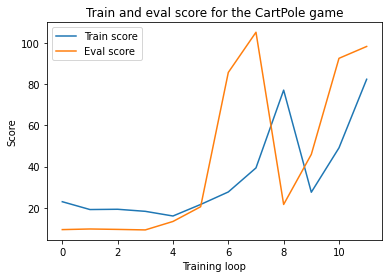

In [ ]:
plt.plot(train_score_cartpole, label="Train score")
plt.plot(eval_score_cartpole, label="Eval score")
plt.title("Train and eval score for the CartPole game")
plt.xlabel("Training loop")
plt.ylabel("Score")
plt.legend()

#### Exemple de sauvegarde et chargement du réseau obtenu <a class="anchor" id="ex_save"></a>

##### Sauvegarde <a class="anchor" id="sauvegarde"></a>

In [ ]:
# sauvegarde du réseau
save_network(muzero_last_network_cartpole, '/content/gdrive/My Drive/RL/cartpole_12loops')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/RL/cartpole_15loops/representation_network/assets
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/RL/cartpole_15loops/value_network/assets
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/RL/cartpole_15loops/policy_network/assets
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/RL/cartpole_15loops/dynamic_network/assets
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/RL/cartpole_15loops/reward_network/assets
Network saved in /content/gdrive/My Drive/RL/cartpole_15loops


Ici on sauvegarde aussi les différents scores obtenus pendant l'entraînement.

In [ ]:
myobject_train = '-'.join([str(x) for x in train_score_cartpole])
myobject_eval = '-'.join([str(x) for x in eval_score_cartpole])

with open('/content/gdrive/My Drive/RL/cartpole_12loops/train_score.pkl', 'wb') as f:
    pickle.dump(myobject_train, f)
with open('/content/gdrive/My Drive/RL/cartpole_12loops/eval_score.pkl', 'wb') as f:
    pickle.dump(myobject_eval, f)

##### Chargement <a class="anchor" id="chargement"></a>

Comme la fonction de chargement renvoie un dictionnaire à passer dans l'argument `network_args` d'une configuration on récupère dans un premier temps ce dictionnaire et on définit une configuration correspondant à notre réseau qui pourra ensuite être réutilisée.

In [ ]:
network_args_cartpole_12loops = get_loaded_network_args('/content/gdrive/My Drive/RL/cartpole_12loops')

In [ ]:
def make_cartpole_config_loaded() -> MuZeroConfig:
    def visit_softmax_temperature(num_moves, training_steps):
        return 1.0

    """
    Cette config peut être modifée pour ajuster le nombre d'épisodes 
    d'entraînement et d'évaluation ainsi que tous les autres hyperparamètres.
    """
    return MuZeroConfig(
        game=CartPole,
        nb_training_loop=2,
        nb_episodes=15,
        nb_epochs=15,
        nb_eval_episodes=20,
        network_args=network_args_cartpole_12loops, # on passe en argument le réseau obtenu ici
        network=CartPoleNetwork,
        action_space_size=2,
        max_moves=1000,
        discount=0.99,
        dirichlet_alpha=0.25,
        num_simulations=11,  # Odd number perform better in eval mode
        batch_size=512,
        td_steps=10,
        visit_softmax_temperature_fn=visit_softmax_temperature,
        lr=0.05)

#### Résultats pour plusieurs entraînements <a class="anchor" id="resultats"></a>

Voici un graphe présentant les scores de train et d'évaluation obtenus pour 3 entraînement comportant 12 boucles d'entraînement chacun.

In [ ]:
train_scores_cartpole = np.array([[22.93, 19.13, 19.27, 18.27, 16, 21.6, 27.67, 39.33, 77.07, 27.53, 49.07, 82.33],
                         [22.13, 14.53, 26.4, 18.73, 18.2, 14.87, 10.67, 32.33, 38, 40.87, 49.07, 85.2],
                         [19.27, 18.73, 16.8, 19.47, 20.8, 18.13, 20.67, 13.87, 17.07, 82.07, 60.13, 110.27]])

eval_scores_cartpole = np.array([[9.4, 9.7, 9.5, 9.25, 13.35, 20.5, 85.65, 105.15, 21.6, 45.9, 92.5, 98.25],
                                 [9.55, 9.1, 8.95, 9.15, 9.6, 52.8, 43.65, 29.55, 43.25, 90, 95.7, 207.95],
                                 [9.4, 9.35, 40.6, 9.4, 9.05, 9.35, 9.2, 34.3, 125.05, 56.85, 76.8, 122.8]])

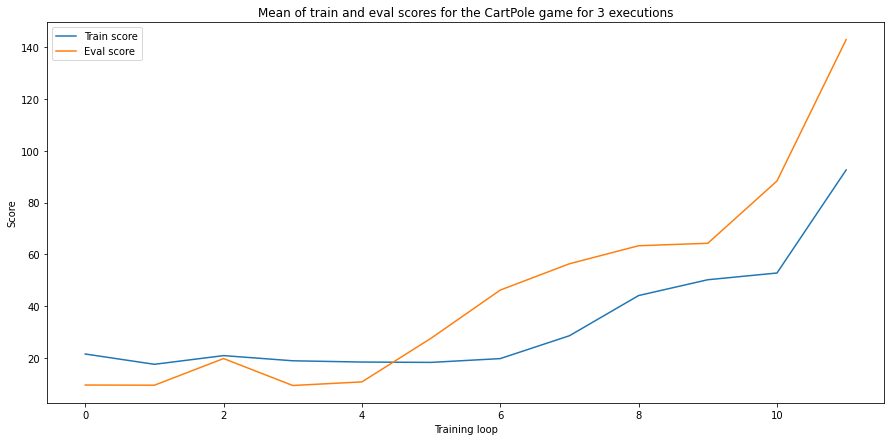

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.mean(train_scores_cartpole, axis=0), label="Train score")
plt.plot(np.mean(eval_scores_cartpole, axis=0), label="Eval score")
plt.title("Mean of train and eval scores for the CartPole game for 3 executions")
plt.xlabel("Training loop")
plt.ylabel("Score")
plt.legend()
plt.show()

Le score d'entraînement et le score d'évaluation obtenus sont la moyenne des récompenses obtenues pour chaque partie de CartPole en mode train ou en mode évaluation. Pour le jeu du CartPole chaque tour réussi entraîne une récompense de +1 et le jeu s'arrête lorsque la barre tombe. Par exemple pour une partie durant 70 tours et pour laquelle la barre tombe au 71ème tour, la récompense totale obtenue sera de +70.

Au cours d'une boucle d'entraînement, le score d'entraînement est obtenu au début grâce aux parties réalisées avec le dernier réseau sauvegardé de la dernière boucle avec de l'exploration dans les MCTS (i.e. avec un bruit de Dirichlet à la racine de ceux-ci). Le score d'évaluation est quant à lui obtenu avec le réseau obtenu à la fin des epochs de la boucle et sans exploration dans les MCTS. Sur ce graphe on observe la moyenne des scores obtenus pour 3 entraînements de MuZero sur le jeu du CartPole afin de vraiment pouvoir observer une tendance plutôt que les particularités d'un seul entraînement.

De manière globale les scores d'évaluation et de train augmentent ce qui montre que l'algorithme apprend. Le train score est constant autour de 20 pendant les 6 premières boucles d'entraînement puis augmente de plus en plus vite pour atteindre 100 après 12 boucles d'entraînement. Différement, l'eval score est presque constant autour de 10 pendant les 4 premières boucles puis augmente ensuite de plus en plus rapidement pour atteindre 140 après 12 boucles d'entraînement. 

L'eval score étant obtenu avec un réseau ultérieur donc plus entraîné que celui utilisé pour le train score on pouvait s'attendre à une courbe orange globalement au dessus de la bleue. Cependant, on constate que ceci est faux pour les 4-5 premières boucles d'entraînement. Cela peut s'expliquer en mode évaluation l'algorithme ne fait que de l'exploitation et plus d'exploration, il aurait donc tendance à se focaliser sur des politiques cupides et donc non optimales lorsque le réseau est peu entraîné. A l'inverse, si l'exploration avantage le train score pour les 4-5 premières boucles celle-ci elle ne permet pas de trouver de politque optimale pour la suite de l'entraînement et l'eval score est donc plus élevé.

Il est important de noter que nous n'avons réalisé que 12 boucles d'entraînement afin de pouvoir fournir un graphe moyenné sur plusieurs entraînements. En effet, au delà le temps de calcul devient vraiment long (plus la boucle d'entraînement est avancée et plus le temps d'exécution d'une boucle est long).

### Exécution pour Acrobot <a class="anchor" id="exec_acrobot"></a>

Cette configuration correspond au jeu Acrobot et contient quelques différence par rapport à celle du CartPole. En effet on constate que les valeurs des différentes clés du paramètre `network_args` sont différentes pour s'adapter à la dimension des observations et les actions.

Malheureusement nous n'avons pas réussi à faire fonctionner l'implémentation pour ce jeu très probablement à cause de la possibilité d'une reward négative. L'algorithme a bloqué plusieurs fois pour le calcul de la loss en essayant de calculer la réciproque de la fonction $h$ de la value (qui peut être négative). Pour palier à ce phénomène nous avons tenté d'ajouter des valeurs absolues et des facteurs de signe, des valeurs absolues seules, ou même d'ajouter 1 à la reward mais l'algorithme ne s'entraîne pas (tous les scores nuls et le maximum de mouvements d'un jeu ateint à chaque fois). Nous avons préféré laissé ce que nous avions fait pour ce jeu afin de garder toutes les traces de nos essais d'ajout de jeu.

In [ ]:
def make_acrobot_config() -> MuZeroConfig:
    def visit_softmax_temperature(num_moves, training_steps):
        return 1.0

    """
    Cette config peut être modifée pour ajuster le nombre d'épisodes 
    d'entraînement et d'évaluation ainsi que tous les autres hyperparamètres.
    """
    return MuZeroConfig(
        game=Acrobot,
        nb_training_loop=10,
        nb_episodes=15,
        nb_epochs=15,
        nb_eval_episodes=20,
        network_args={'action_size': 3,
                      'state_size': 6,
                      'representation_size': 6,
                      'max_value': 500},
        network=AcrobotNetwork,
        action_space_size=3,
        max_moves=500,
        discount=0.99,
        dirichlet_alpha=0.25,
        num_simulations=11,  # Odd number perform better in eval mode
        batch_size=512,
        td_steps=10,
        visit_softmax_temperature_fn=visit_softmax_temperature,
        lr=0.05)

In [ ]:
config_acrobot = make_acrobot_config()
muzero_last_network_acrobot = muzero(config_acrobot)

Training loop 0


KeyboardInterrupt: ignored